In [10]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [11]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('../images') if isfile(join('../images', f))])

In [76]:
def bound_box(image_path):
    # load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    """print(image.shape)
    plt.imshow(gray, 'gray')"""

    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction using OpenCV 2.4
    ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
    gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    
    """vertical = False
    if cv2.convertScaleAbs(gradY).sum()>cv2.convertScaleAbs(gradX).sum():
        vertical = True"""

    #image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

    """plt.figure()
    plt.imshow(image_horizontal_derivative, 'gray')"""
    
    blurred = cv2.blur(gradient, (9, 9))
    ret2,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (20, 20))
    #closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
    #opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    dilated = cv2.dilate(opened, kernel, iterations=3)
    
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    #print(rect)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    # draw a bounding box arounded the detected barcode and display the
    # image
    image_bb = image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    print(coordinates_source)
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    
        
    # Computing the trasformation, i.e. homography. Warping.
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    # Applying the trasformation
    gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray1, 'gray')

[[ 400.  246.]
 [1291.  242.]
 [ 404. 1072.]
 [1295. 1068.]]
Wall time: 150 ms


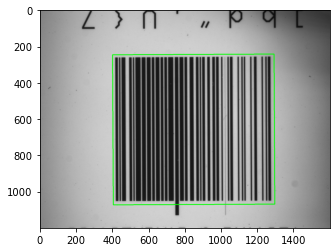

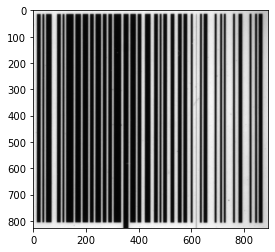

In [13]:
%%time
bound_box(f'../images/{images_paths[0]}')

[[ 349.  274.]
 [1244.  274.]
 [ 349. 1103.]
 [1244. 1103.]]
Wall time: 90.9 ms


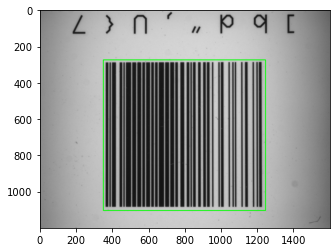

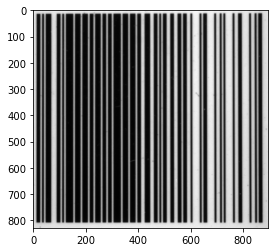

In [14]:
%%time
bound_box(f'../images/{images_paths[1]}')

[[ 200.  228.]
 [1038.  223.]
 [ 202.  742.]
 [1041.  737.]]
Wall time: 87.1 ms


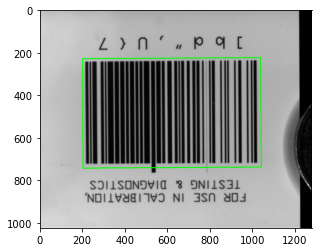

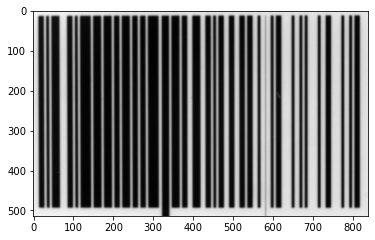

In [15]:
%%time
bound_box(f'../images/{images_paths[2]}')

[[130. 245.]
 [968. 245.]
 [130. 758.]
 [968. 758.]]
Wall time: 165 ms


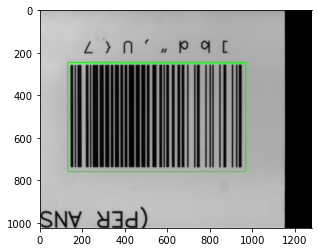

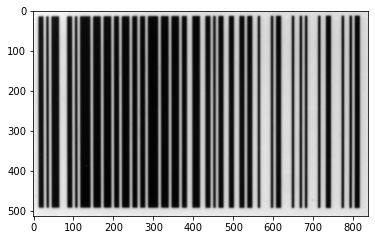

In [16]:
%%time
bound_box(f'../images/{images_paths[3]}')

[[337. 157.]
 [901. 159.]
 [335. 702.]
 [899. 703.]]
Wall time: 153 ms


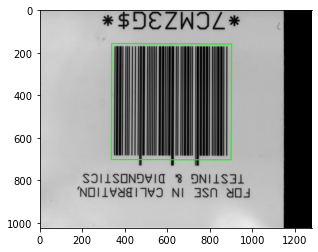

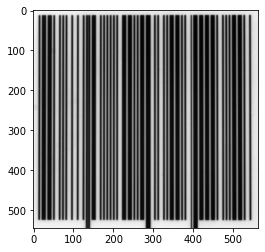

In [17]:
%%time
bound_box(f'../images/{images_paths[4]}')

[[342. 237.]
 [908. 237.]
 [342. 781.]
 [908. 781.]]


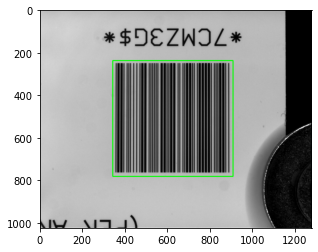

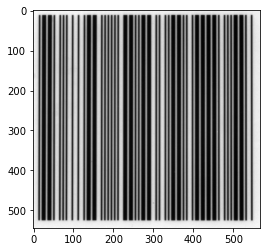

In [18]:
bound_box(f'../images/{images_paths[5]}')

[[ 165.  273.]
 [1099.  273.]
 [ 165.  818.]
 [1099.  818.]]


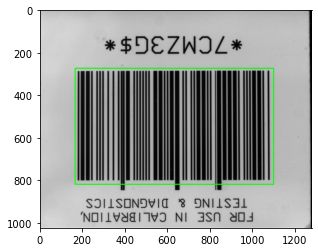

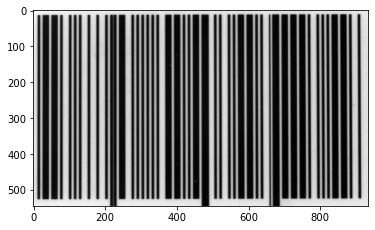

In [19]:
bound_box(f'../images/{images_paths[6]}')

[[ 151.  262.]
 [1090.  262.]
 [ 151.  807.]
 [1090.  807.]]


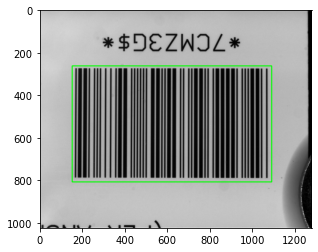

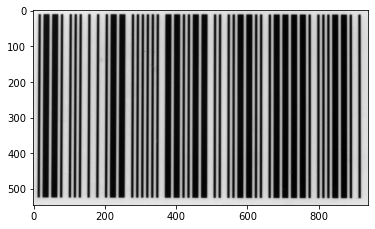

In [20]:
bound_box(f'../images/{images_paths[7]}')

[[ 151.  262.]
 [1090.  262.]
 [ 151.  807.]
 [1090.  807.]]


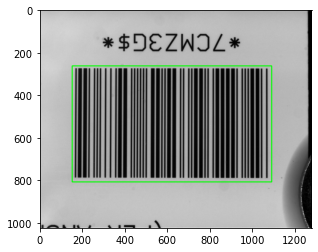

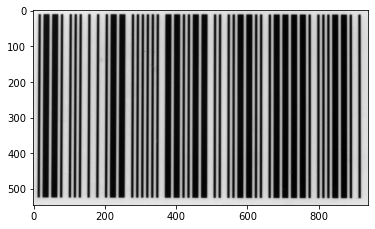

In [21]:
bound_box(f'../images/{images_paths[7]}')

[[332. 323.]
 [971. 327.]
 [328. 795.]
 [967. 800.]]


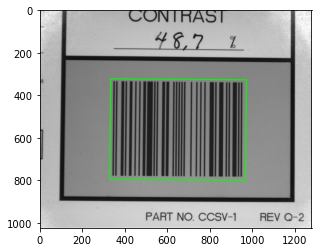

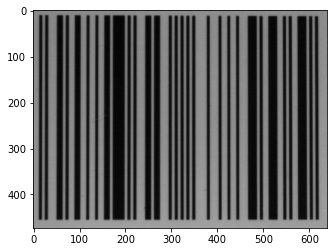

In [22]:
bound_box(f'../images/{images_paths[8]}')

[[344. 241.]
 [978. 250.]
 [337. 736.]
 [971. 745.]]


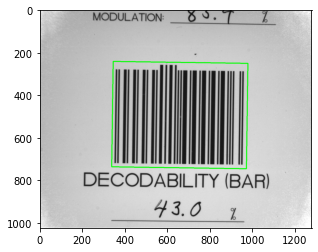

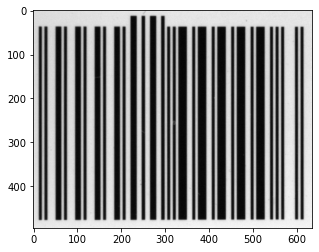

In [23]:
bound_box(f'../images/{images_paths[9]}')

In [24]:
print(f'../images/{images_paths[10]}')

images/EAN-UPC-DEFECTS IMGB.BMP


[[456. 182.]
 [924. 182.]
 [456. 815.]
 [924. 815.]]


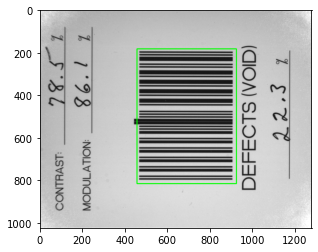

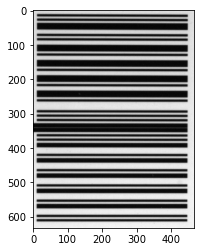

In [25]:
bound_box(f'../images/{images_paths[10]}')

[[273. 253.]
 [952. 250.]
 [276. 773.]
 [954. 770.]]


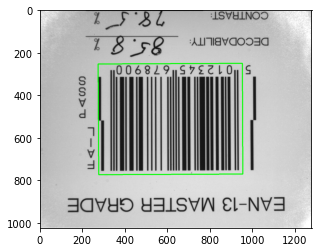

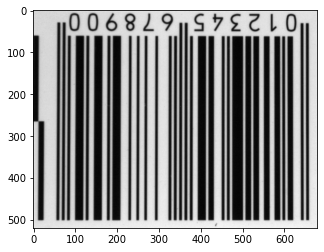

In [26]:
bound_box(f'../images/{images_paths[11]}')

[[367. 200.]
 [887. 200.]
 [367. 832.]
 [887. 832.]]


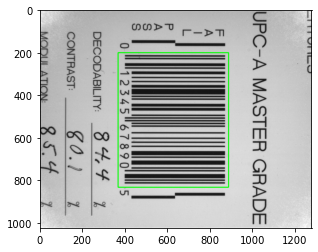

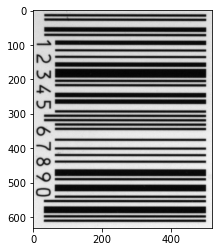

In [27]:
bound_box(f'../images/{images_paths[12]}')

[[ 100.  107.]
 [1051.  107.]
 [ 100.  327.]
 [1051.  327.]]


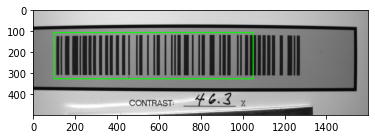

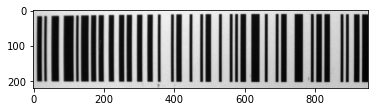

In [28]:
bound_box(f'../images/{images_paths[13]}')

[[  99.   54.]
 [1291.   55.]
 [  98.  326.]
 [1290.  328.]]


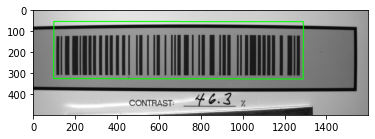

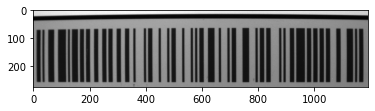

In [77]:
bound_box(f'../images/{images_paths[13]}')

[[ 163.  131.]
 [1348.  131.]
 [ 163.  352.]
 [1348.  352.]]


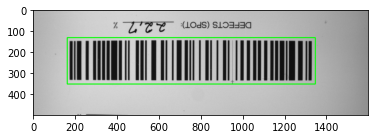

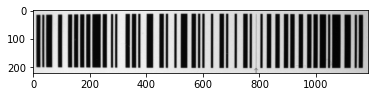

In [29]:
bound_box(f'../images/{images_paths[14]}')

[[ 177.  154.]
 [1143.  145.]
 [ 179.  378.]
 [1145.  368.]]


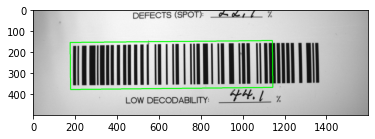

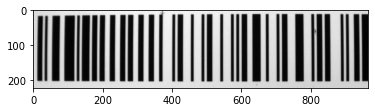

In [30]:
bound_box(f'../images/{images_paths[15]}')

[[ 176.  151.]
 [1381.  141.]
 [ 178.  465.]
 [1384.  455.]]


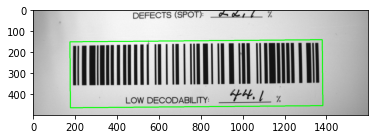

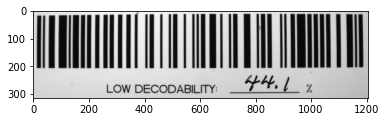

In [78]:
bound_box(f'../images/{images_paths[15]}')

[[ 201.  128.]
 [1153.  128.]
 [ 201.  348.]
 [1153.  348.]]


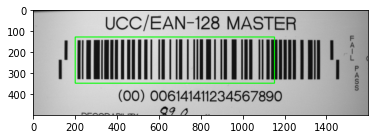

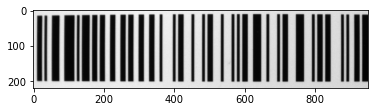

In [31]:
bound_box(f'../images/{images_paths[16]}')

[[ 200.  127.]
 [1387.  127.]
 [ 200.  347.]
 [1387.  347.]]


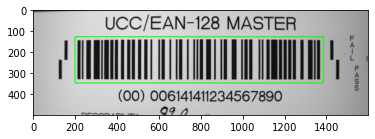

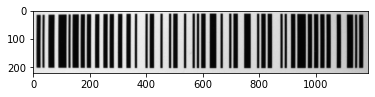

In [79]:
bound_box(f'../images/{images_paths[16]}')

[[ 196.  131.]
 [1349.  112.]
 [ 201.  402.]
 [1354.  383.]]


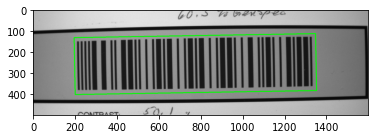

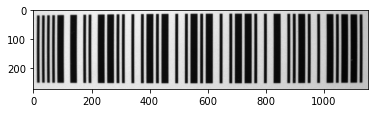

In [32]:
bound_box(f'../images/{images_paths[17]}')

[[ 198.  114.]
 [1355.  105.]
 [ 201.  385.]
 [1358.  377.]]


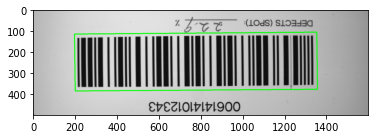

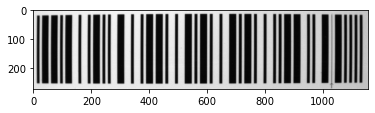

In [33]:
bound_box(f'../images/{images_paths[18]}')

[[ 232.   46.]
 [1383.   46.]
 [ 232.  391.]
 [1383.  391.]]


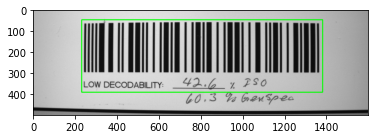

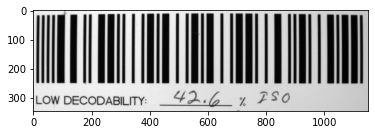

In [34]:
bound_box(f'../images/{images_paths[19]}')

[[ 249.  128.]
 [1405.  119.]
 [ 251.  398.]
 [1407.  389.]]


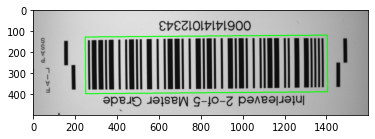

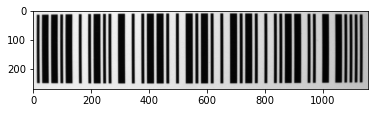

In [35]:
bound_box(f'../images/{images_paths[20]}')

[[242. 177.]
 [822. 170.]
 [248. 659.]
 [828. 652.]]


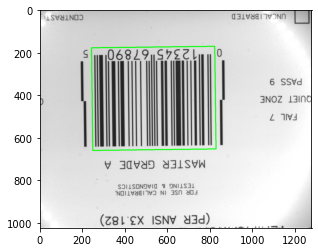

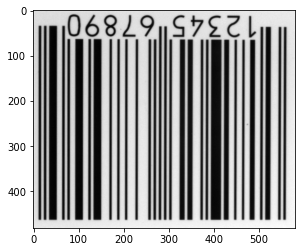

In [38]:
bound_box(f'../images/{images_paths[22]}')

[[242. 177.]
 [822. 170.]
 [248. 659.]
 [828. 652.]]


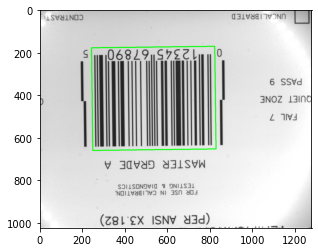

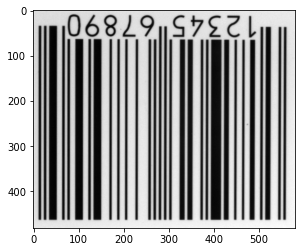

In [39]:
bound_box(f'../images/{images_paths[22]}')

[[315. 271.]
 [895. 276.]
 [311. 752.]
 [891. 757.]]


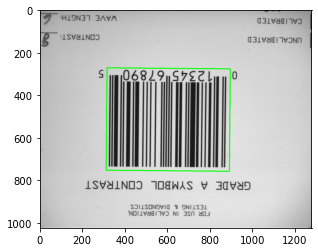

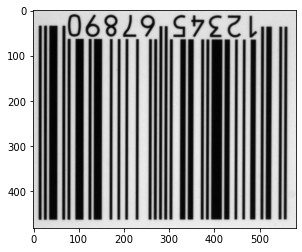

In [40]:
bound_box(f'../images/{images_paths[23]}')

[[348. 267.]
 [926. 276.]
 [341. 748.]
 [919. 756.]]


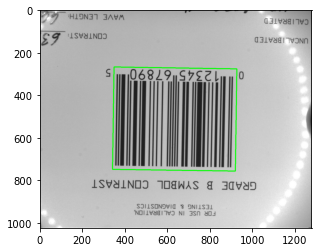

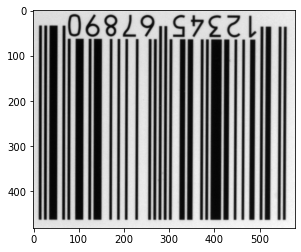

In [41]:
bound_box(f'../images/{images_paths[24]}')

[[356. 272.]
 [934. 273.]
 [355. 749.]
 [933. 751.]]


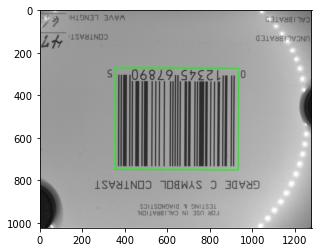

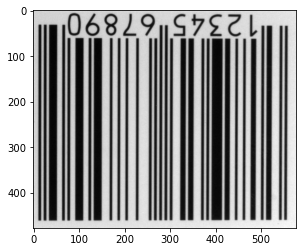

In [42]:
bound_box(f'../images/{images_paths[25]}')

[[298. 246.]
 [874. 267.]
 [281. 726.]
 [857. 747.]]


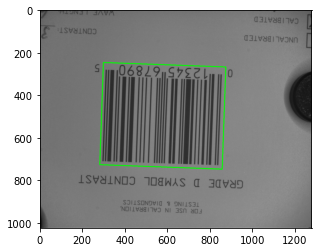

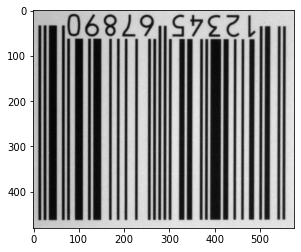

In [43]:
bound_box(f'../images/{images_paths[26]}')

[[333. 264.]
 [910. 272.]
 [326. 738.]
 [903. 746.]]


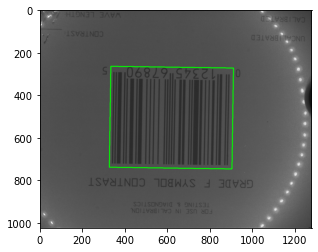

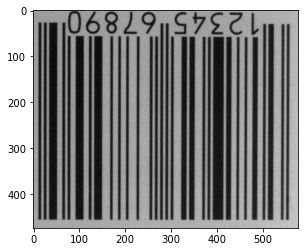

In [44]:
bound_box(f'../images/{images_paths[27]}')

[[327. 261.]
 [907. 268.]
 [321. 743.]
 [901. 750.]]


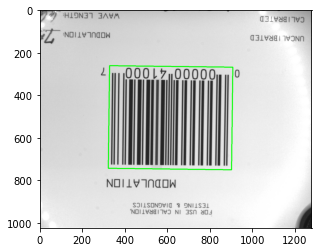

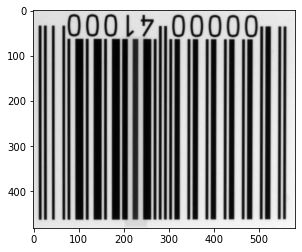

In [45]:
bound_box(f'../images/{images_paths[28]}')

[[327. 266.]
 [906. 275.]
 [319. 749.]
 [899. 758.]]


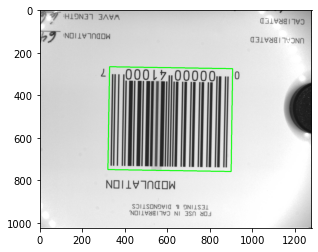

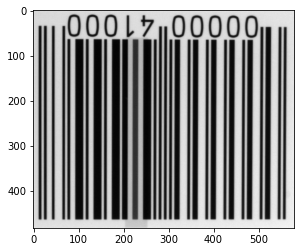

In [46]:
bound_box(f'../images/{images_paths[29]}')

[[324. 276.]
 [904. 288.]
 [314. 770.]
 [894. 781.]]


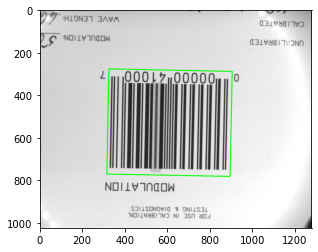

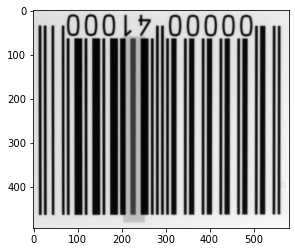

In [47]:
bound_box(f'../images/{images_paths[30]}')

[[333. 265.]
 [911. 281.]
 [319. 767.]
 [896. 783.]]


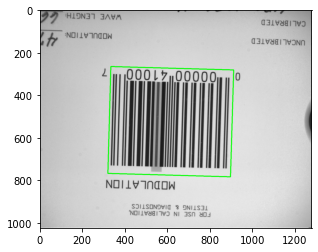

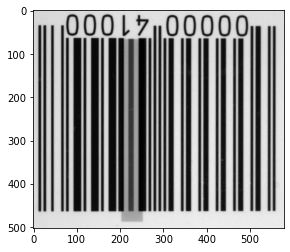

In [48]:
bound_box(f'../images/{images_paths[31]}')

[[332. 257.]
 [911. 258.]
 [332. 752.]
 [911. 752.]]


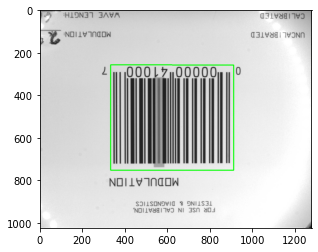

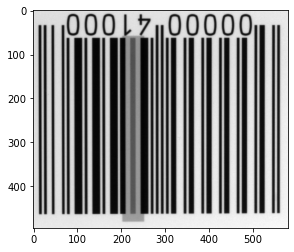

In [49]:
bound_box(f'../images/{images_paths[32]}')

[[345. 265.]
 [923. 269.]
 [341. 746.]
 [919. 750.]]


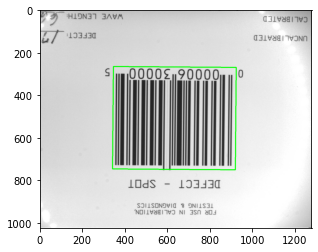

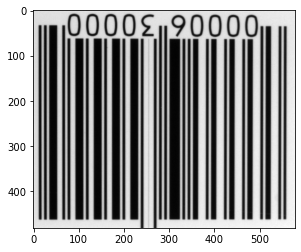

In [50]:
bound_box(f'../images/{images_paths[34]}')

[[344. 255.]
 [923. 261.]
 [339. 735.]
 [918. 742.]]


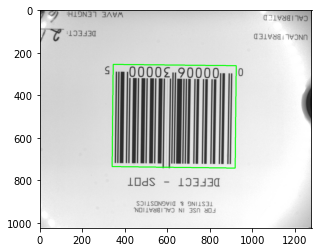

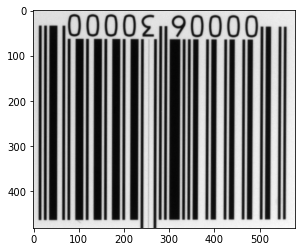

In [51]:
bound_box(f'../images/{images_paths[35]}')

[[332. 259.]
 [910. 259.]
 [332. 740.]
 [910. 740.]]


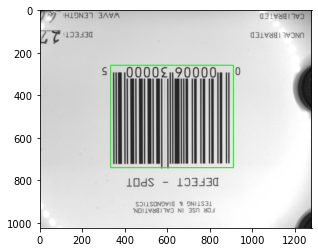

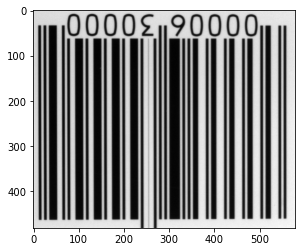

In [52]:
bound_box(f'../images/{images_paths[36]}')

[[320. 265.]
 [898. 267.]
 [318. 746.]
 [896. 748.]]


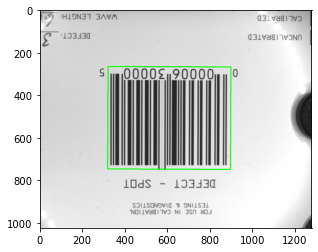

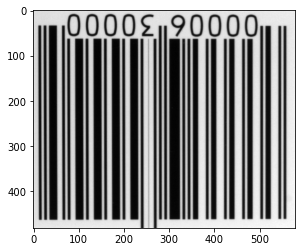

In [53]:
bound_box(f'../images/{images_paths[37]}')

[[331. 267.]
 [910. 267.]
 [331. 748.]
 [910. 748.]]


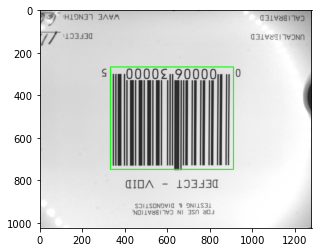

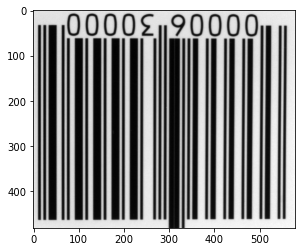

In [54]:
bound_box(f'../images/{images_paths[38]}')

[[335. 258.]
 [914. 264.]
 [330. 739.]
 [909. 746.]]


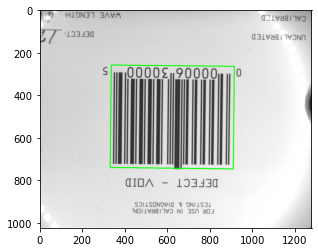

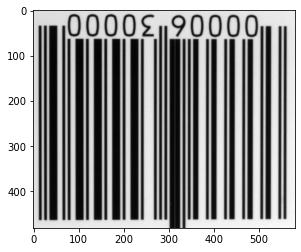

In [55]:
bound_box(f'../images/{images_paths[39]}')

[[299. 269.]
 [878. 271.]
 [297. 750.]
 [877. 751.]]


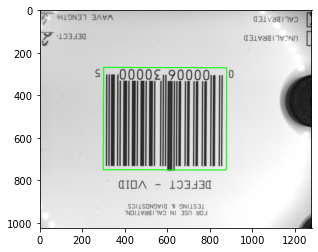

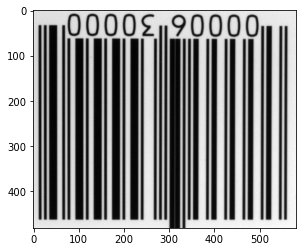

In [56]:
bound_box(f'../images/{images_paths[40]}')

[[299. 269.]
 [878. 271.]
 [297. 750.]
 [877. 751.]]


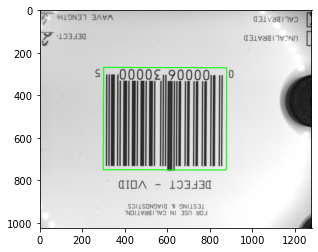

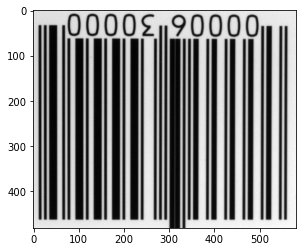

In [57]:
bound_box(f'../images/{images_paths[40]}')

[[288. 261.]
 [867. 258.]
 [290. 742.]
 [870. 739.]]


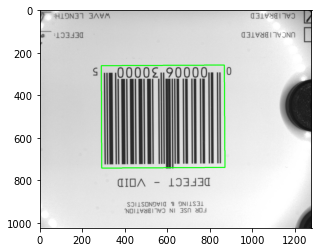

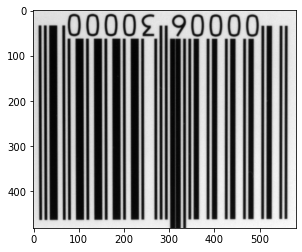

In [58]:
bound_box(f'../images/{images_paths[41]}')

[[286. 257.]
 [864. 258.]
 [286. 738.]
 [864. 738.]]


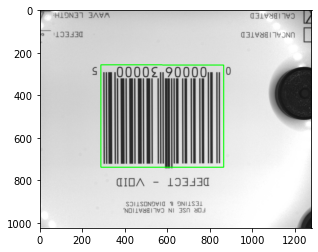

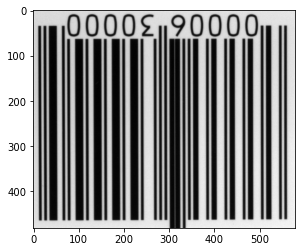

In [59]:
bound_box(f'../images/{images_paths[42]}')

[[281. 254.]
 [860. 254.]
 [281. 735.]
 [860. 735.]]


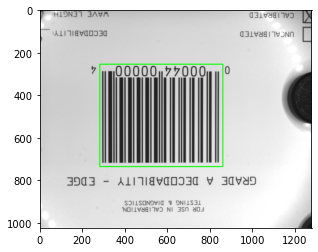

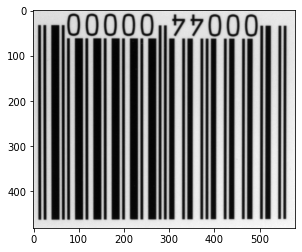

In [60]:
bound_box(f'../images/{images_paths[43]}')

[[281. 254.]
 [860. 254.]
 [281. 735.]
 [860. 735.]]


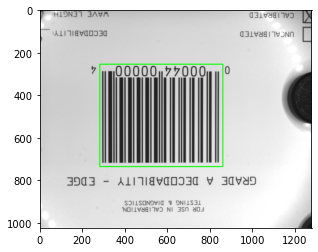

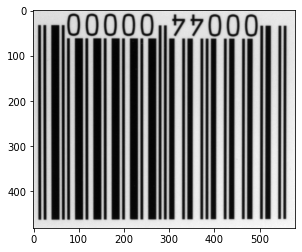

In [61]:
bound_box(f'../images/{images_paths[43]}')

[[291. 259.]
 [870. 263.]
 [288. 740.]
 [867. 744.]]


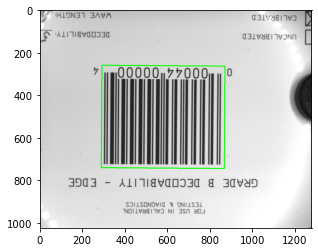

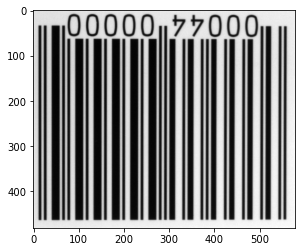

In [62]:
bound_box(f'../images/{images_paths[44]}')

[[279. 273.]
 [859. 273.]
 [279. 754.]
 [859. 754.]]


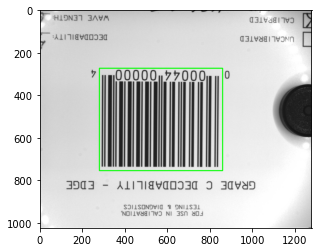

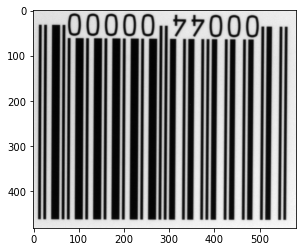

In [63]:
bound_box(f'../images/{images_paths[45]}')

[[264. 260.]
 [844. 267.]
 [258. 742.]
 [838. 749.]]


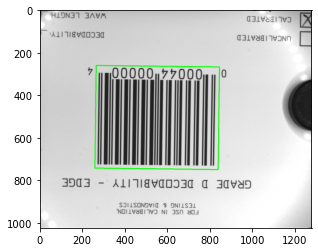

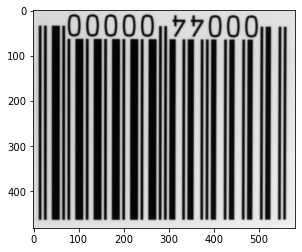

In [64]:
bound_box(f'../images/{images_paths[46]}')

[[258. 269.]
 [839. 273.]
 [255. 750.]
 [835. 754.]]


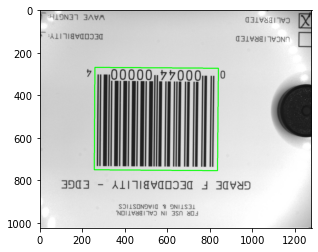

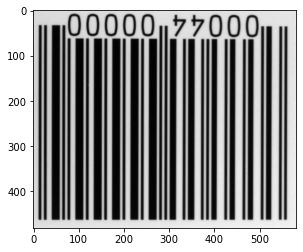

In [65]:
bound_box(f'../images/{images_paths[47]}')

[[252. 267.]
 [833. 274.]
 [246. 748.]
 [827. 756.]]


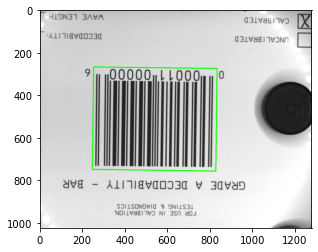

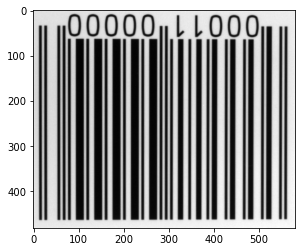

In [66]:
bound_box(f'../images/{images_paths[48]}')

[[256. 267.]
 [837. 274.]
 [251. 750.]
 [831. 756.]]


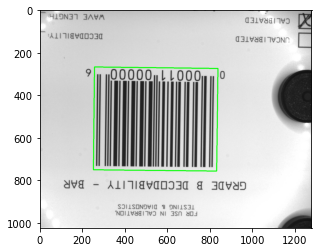

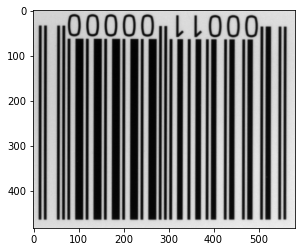

In [67]:
bound_box(f'../images/{images_paths[49]}')

[[281. 245.]
 [861. 253.]
 [275. 727.]
 [855. 734.]]


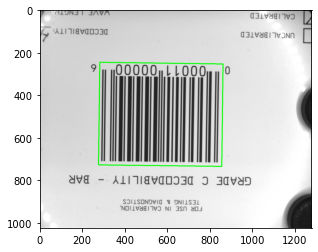

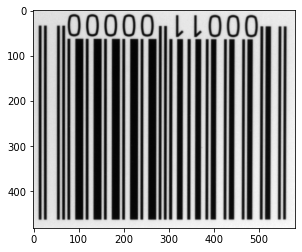

In [68]:
bound_box(f'../images/{images_paths[50]}')

[[283. 255.]
 [863. 263.]
 [277. 737.]
 [857. 745.]]


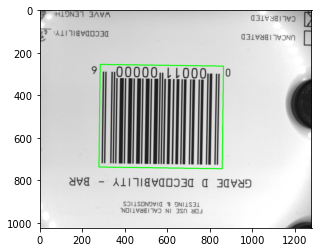

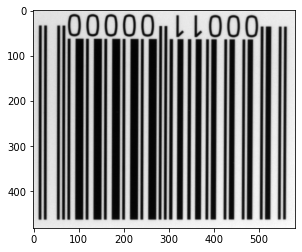

In [69]:
bound_box(f'../images/{images_paths[51]}')

[[297. 257.]
 [876. 260.]
 [294. 738.]
 [874. 741.]]


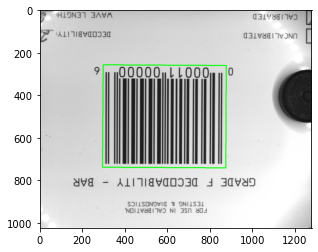

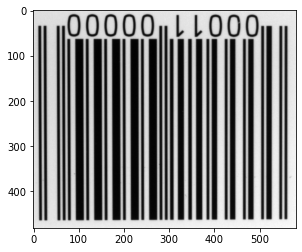

In [70]:
bound_box(f'../images/{images_paths[52]}')

[[ 98.  32.]
 [258.  32.]
 [ 98. 166.]
 [258. 166.]]
Wall time: 33.2 ms


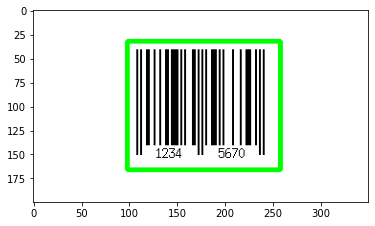

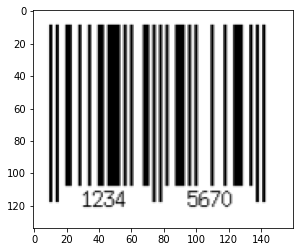

In [71]:
%%time
bound_box('other images/1.png')

[[   0.    0.]
 [1599.    0.]
 [   0.  284.]
 [1599.  284.]]
Wall time: 105 ms


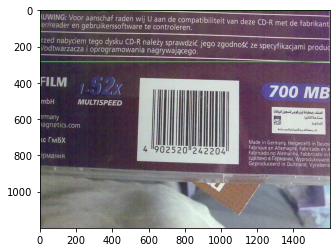

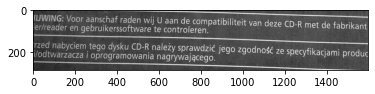

In [72]:
%%time
bound_box('other images/2.jpg')

[[   0.    0.]
 [1199.    0.]
 [   0. 1435.]
 [1199. 1435.]]
Wall time: 117 ms


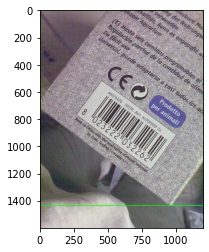

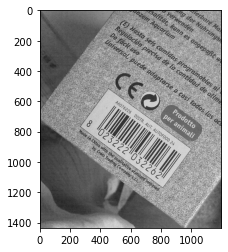

In [73]:
%%time
bound_box('other images/3.jpg')  # NO ROTATION INVARIANCE